# Sessió 5.2: Preprocessament de dades

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.impute import SimpleImputer, KNNImputer

## *Missing values*

In [4]:
df = pd.DataFrame({'A': [np.nan, 2, 3, np.nan, 1],
                   'B': [3, 5, np.nan, 6, 5.5],
                   'C': [0, np.nan, 3, np.nan, 1],
                   'D': [2, 6, 3, np.nan, 2],
                  })
df

,A,B,C,D
0,NaN,3.0,0.0,2.0
1,2.0,5.0,NaN,6.0
2,3.0,NaN,3.0,3.0
3,NaN,6.0,NaN,NaN
4,1.0,5.5,1.0,2.0


In [5]:
df.isnull().sum() # isnull or isna

A    2
B    1
C    2
D    1
dtype: int64

In [6]:
df.dropna()

,A,B,C,D
4,1.0,5.5,1.0,2.0


In [7]:
pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy="mean").fit_transform(df), columns=df.columns)

,A,B,C,D
0,2.0,3.000,0.000000,2.00
1,2.0,5.000,1.333333,6.00
2,3.0,4.875,3.000000,3.00
3,2.0,6.000,1.333333,3.25
4,1.0,5.500,1.000000,2.00


In [8]:
pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy="median").fit_transform(df), columns=df.columns)

,A,B,C,D
0,2.0,3.00,0.0,2.0
1,2.0,5.00,1.0,6.0
2,3.0,5.25,3.0,3.0
3,2.0,6.00,1.0,2.5
4,1.0,5.50,1.0,2.0


In [9]:
pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy="most_frequent").fit_transform(df), columns=df.columns)

,A,B,C,D
0,1.0,3.0,0.0,2.0
1,2.0,5.0,0.0,6.0
2,3.0,3.0,3.0,3.0
3,1.0,6.0,0.0,2.0
4,1.0,5.5,1.0,2.0


In [9]:
pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0).fit_transform(df), columns=df.columns)

,A,B,C,D
0,0.0,3.0,0.0,2.0
1,2.0,5.0,0.0,6.0
2,3.0,0.0,3.0,3.0
3,0.0,6.0,0.0,0.0
4,1.0,5.5,1.0,2.0


In [10]:
pd.DataFrame(KNNImputer(missing_values=np.nan).fit_transform(df), columns=df.columns)

,A,B,C,D
0,2.0,3.000,0.000000,2.00
1,2.0,5.000,1.333333,6.00
2,3.0,4.875,3.000000,3.00
3,2.0,6.000,1.333333,3.25
4,1.0,5.500,1.000000,2.00


## Codificació de variables categòriques

### Variables ordinals

#### Exemple del conjunt de dades dels diamants

- `carat` weight of the diamond (0.2--5.01)
- `cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color` diamond colour, from J (worst) to D (best)
- `clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- `depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- `table` width of top of diamond relative to widest point (43--95)
- `price` price in US dollars (\$326--\$18,823)
- `x` length in mm (0--10.74)
- `y` width in mm (0--58.9)
- `z` depth in mm (0--31.8)


In [10]:
diam_df = sns.load_dataset("diamonds")
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
diam_df["cut"] = diam_df["cut"].map({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})
diam_df["color"] = diam_df["color"].map({'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6})
diam_df["clarity"] = diam_df["clarity"].map({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74


### Variables no ordinals

#### Exemple del conjunt de dades de malalties cardíaques

https://archive.ics.uci.edu/ml/datasets/heart+disease

- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- num: diagnosis of heart disease (angiographic disease status) (Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing)


https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [11]:
heart_df = pd.read_csv('./DataSets/heart.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
heart_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
heart_df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
import warnings # Provar què passa si el treiem
warnings.filterwarnings('ignore')

heart_df['sex'][heart_df['sex'] == 0] = 'female'
heart_df['sex'][heart_df['sex'] == 1] = 'male'

heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 1] = 'typical angina'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 2] = 'atypical angina'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 3] = 'non-anginal pain'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 4] = 'asymptomatic'

heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart_df['rest_ecg'][heart_df['rest_ecg'] == 0] = 'normal'
heart_df['rest_ecg'][heart_df['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart_df['rest_ecg'][heart_df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart_df['exercise_induced_angina'][heart_df['exercise_induced_angina'] == 0] = 'no'
heart_df['exercise_induced_angina'][heart_df['exercise_induced_angina'] == 1] = 'yes'

heart_df['st_slope'][heart_df['st_slope'] == 1] = 'upsloping'
heart_df['st_slope'][heart_df['st_slope'] == 2] = 'flat'
heart_df['st_slope'][heart_df['st_slope'] == 3] = 'downsloping'

heart_df['thalassemia'][heart_df['thalassemia'] == 1] = 'normal'
heart_df['thalassemia'][heart_df['thalassemia'] == 2] = 'fixed defect'
heart_df['thalassemia'][heart_df['thalassemia'] == 3] = 'reversable defect'

heart_df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,upsloping,0,reversable defect,0
299,45,male,non-anginal pain,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,upsloping,0,reversable defect,0
300,68,male,0,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,upsloping,2,reversable defect,0
301,57,male,0,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,upsloping,1,reversable defect,0


In [15]:
(heart_df == 0).sum()

age                          0
sex                          0
chest_pain_type            143
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
rest_ecg                     0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression               99
st_slope                    21
num_major_vessels          175
thalassemia                  2
target                     138
dtype: int64

In [18]:
cols_with_na = ["chest_pain_type", "st_slope", "thalassemia"]
heart_df[cols_with_na] = heart_df[cols_with_na].replace({0: np.nan})
heart_df.isnull().sum()

age                          0
sex                          0
chest_pain_type            143
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
rest_ecg                     0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                    21
num_major_vessels            0
thalassemia                  2
target                       0
dtype: int64

In [19]:
heart_df.shape

(303, 14)

In [20]:
heart_df = heart_df.dropna()
heart_df.shape

(149, 14)

Segurament seria millor considerar imputar, ja que perdem més de la meitat de les dades!

In [21]:
heart_df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [22]:
heart_df = pd.get_dummies(heart_df, drop_first=True)
heart_df

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
2,41,130,204,172,1.4,0,1,0,0,1,1,0,1,0,0,0,0
3,56,120,236,178,0.8,0,1,1,0,1,1,0,0,0,0,0,0
6,56,140,294,153,1.3,0,1,0,0,1,1,0,1,0,1,0,0
7,44,120,263,173,0.0,0,1,1,0,1,1,0,0,0,0,0,1
8,52,172,199,162,0.5,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,59,134,204,162,0.8,2,0,1,1,0,1,0,0,0,0,0,0
287,57,154,232,164,0.0,1,0,1,0,1,1,0,1,0,0,0,0
293,67,152,212,150,0.8,0,0,1,0,0,1,0,1,0,1,0,1
299,45,110,264,132,1.2,0,0,1,1,0,1,0,0,0,1,0,1


### *Outliers*

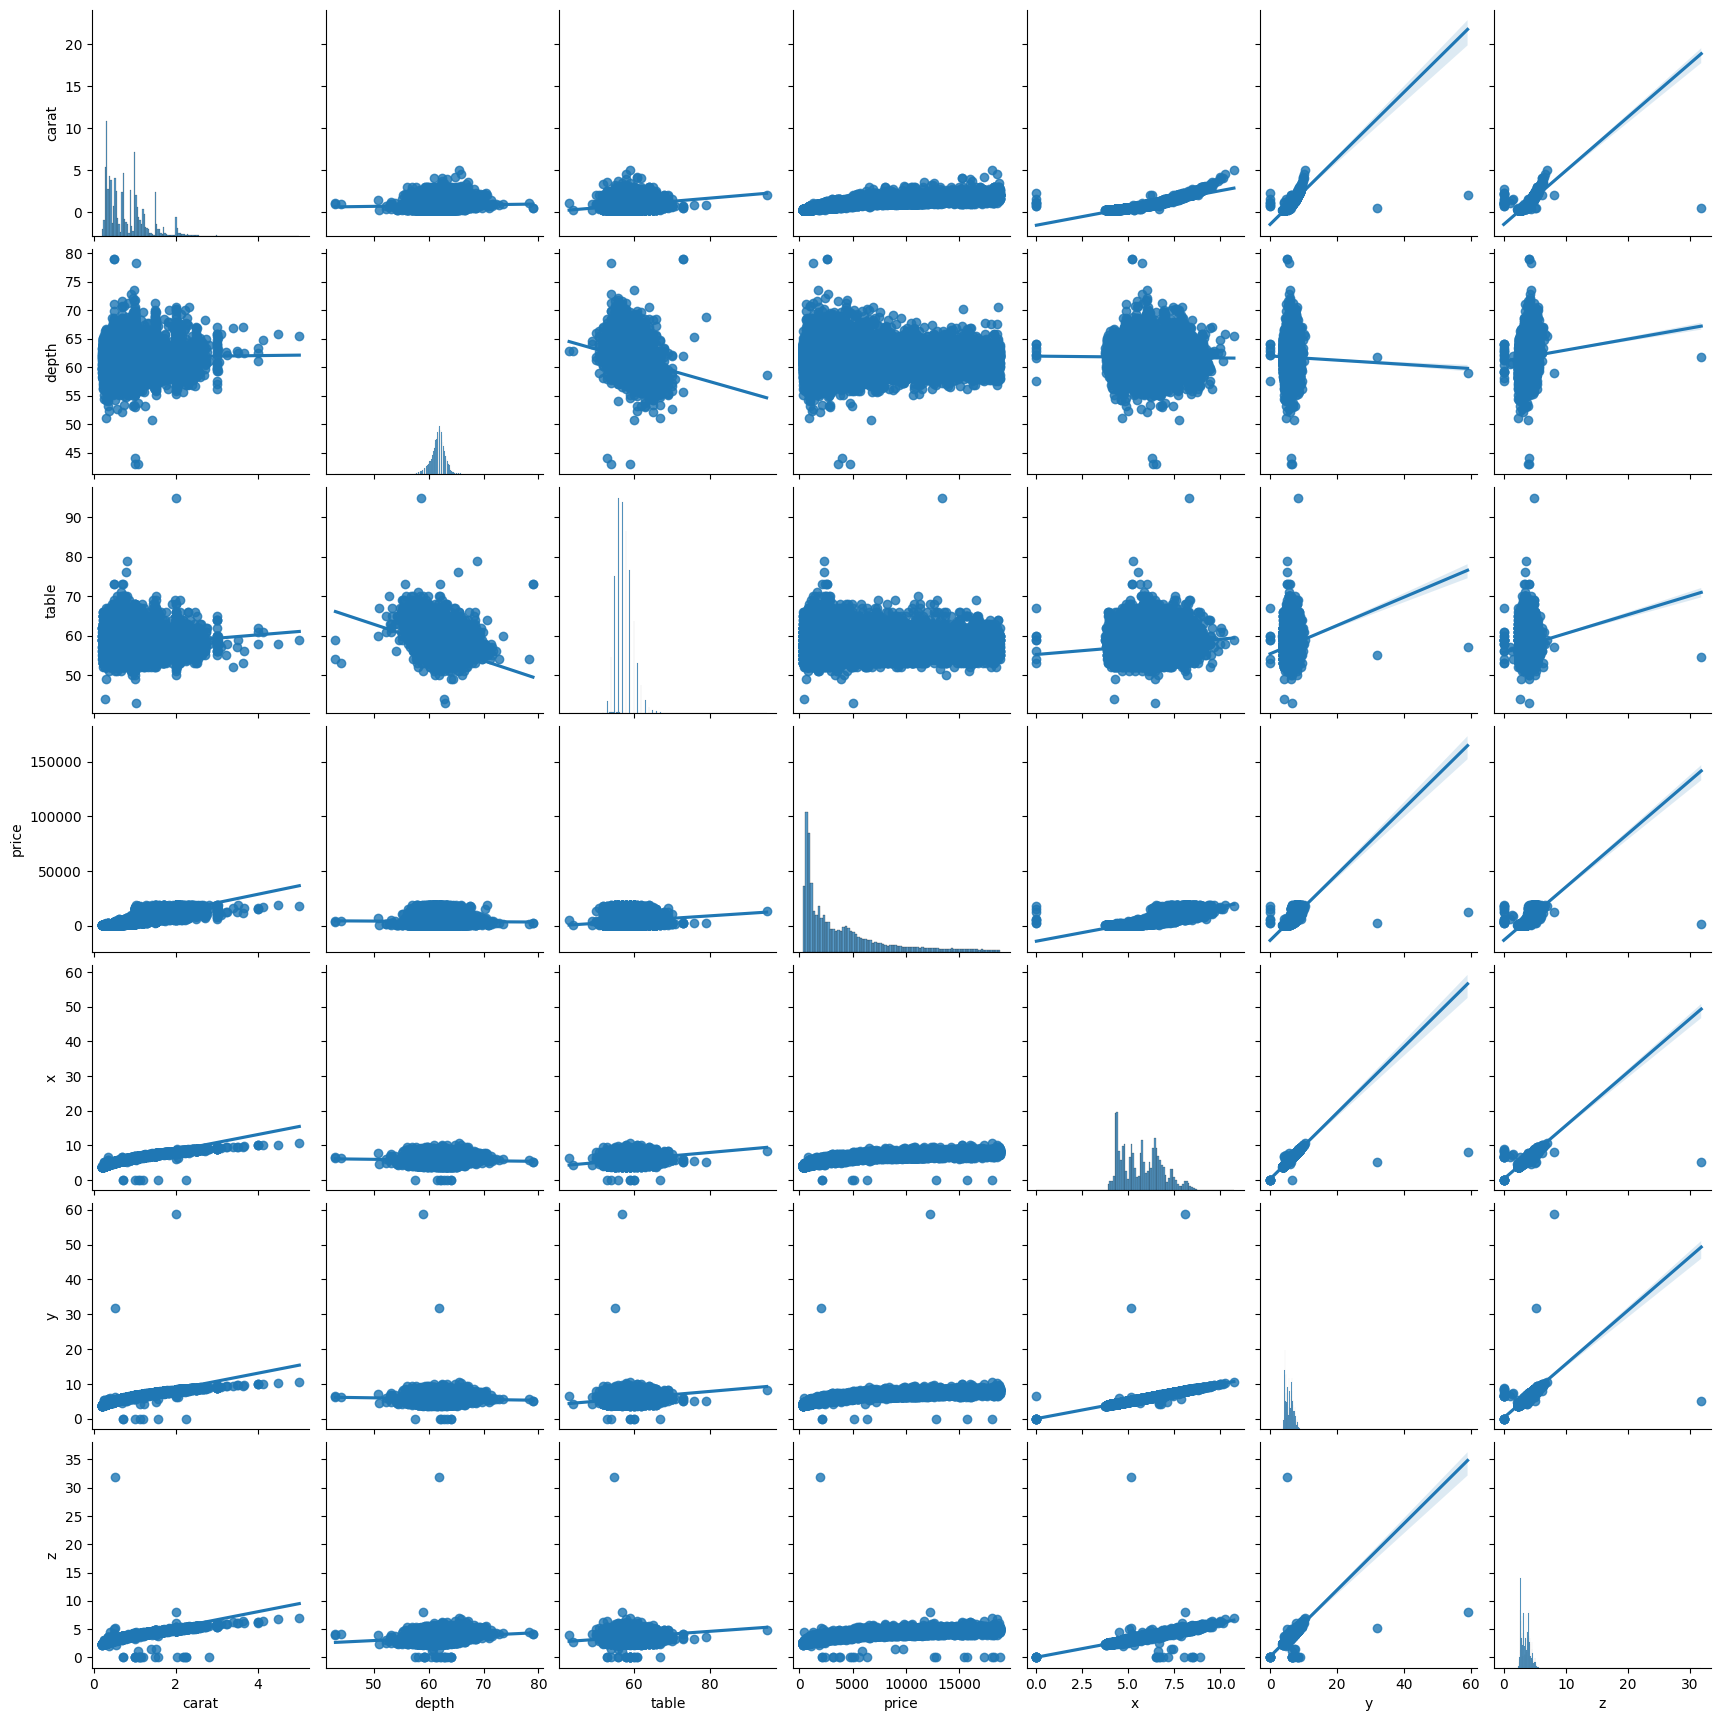

In [23]:
sns.pairplot(diam_df, kind="reg");

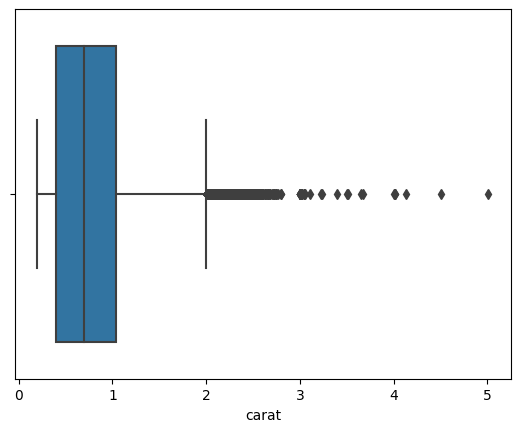

In [24]:
sns.boxplot(x=diam_df["carat"]);

In [25]:
diam_df[diam_df["carat"] > 4]

,carat,cut,color,clarity,depth,table,price,x,y,z
25998,4.01,3,5,0,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,3,6,0,62.5,62.0,15223,10.02,9.94,6.24
27130,4.13,0,4,0,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,0,6,0,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,0,6,0,65.8,58.0,18531,10.23,10.16,6.72


## Exercici

* Llegeix el conjunt de dades de pingüins (https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) sense utilitzar la funció `sns.load_dataset`.
* Tracta els *missing values*.
* Detecta possibles *outliers* del conjunt de dades.
* Estandarditza les dades.
* Crea un nou *data frame* seleccionant únicament els pingüins de la raça Gentoo.
* Modela el pes en funció de la resta de variables (longitud i profunditat del bec, longitud de les aletes, sexe i illa), codificant adequadament les variables categòriques explicatives.
* Quin pes hauria de tenir un pingüí mascle de l'illa Biscoe amb un bec de 40 mm de longitud i 20mm de profunditat, i unes aletes de 180 mm?

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
df = df[df["species"] == "Gentoo"]
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [29]:
df[df["island"] != "Biscoe"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [30]:
df.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  5
dtype: int64

In [31]:
df = df.drop(columns=["island"])
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


In [32]:
df = pd.get_dummies(df, drop_first=True)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
220,46.1,13.2,211.0,4500.0,0
221,50.0,16.3,230.0,5700.0,1
222,48.7,14.1,210.0,4450.0,0
223,50.0,15.2,218.0,5700.0,1
224,47.6,14.5,215.0,5400.0,1
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,0


In [33]:
from sklearn.impute import KNNImputer
df = pd.DataFrame(KNNImputer(missing_values=np.nan).fit_transform(df), columns=df.columns)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,46.10,13.20,211.0,4500.0,0.0
1,50.00,16.30,230.0,5700.0,1.0
2,48.70,14.10,210.0,4450.0,0.0
3,50.00,15.20,218.0,5700.0,1.0
4,47.60,14.50,215.0,5400.0,1.0
...,...,...,...,...,...
119,45.16,13.94,211.4,4495.0,0.0
120,46.80,14.30,215.0,4850.0,0.0
121,50.40,15.70,222.0,5750.0,1.0
122,45.20,14.80,212.0,5200.0,0.0


In [34]:
df.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex_MALE             0
dtype: int64

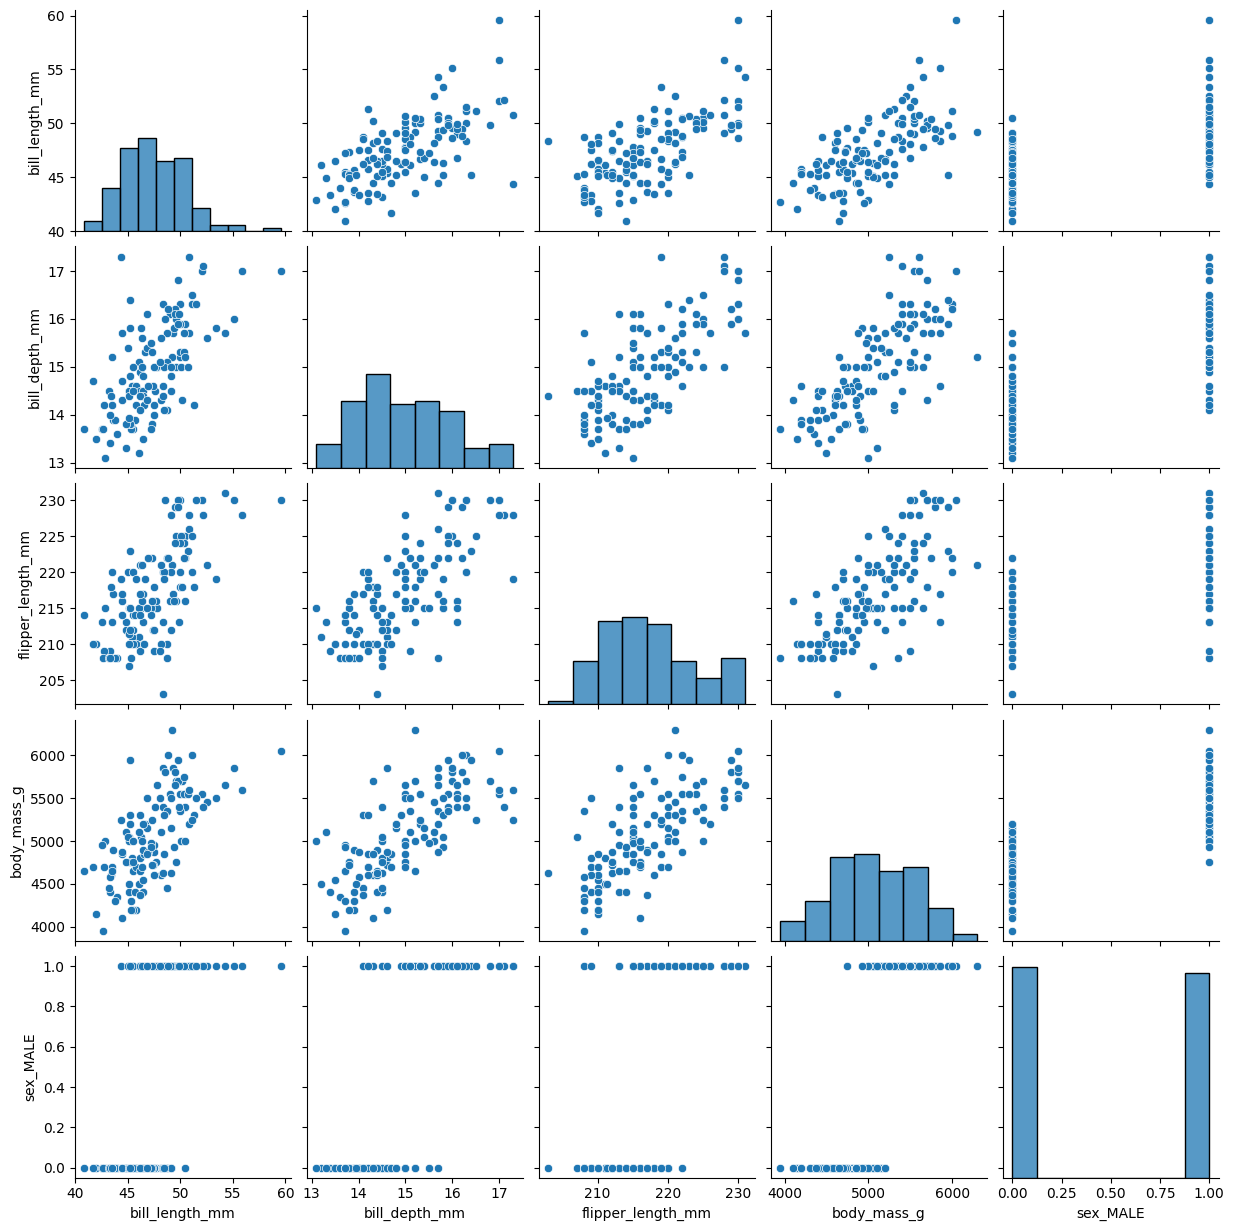

In [35]:
sns.pairplot(df);

In [36]:
X = df.drop(columns=["body_mass_g"])
y = df["body_mass_g"]

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex_MALE
0,-0.452326,-1.814115,-0.951508,-0.983999
1,0.820483,1.356503,1.992743,1.016261
2,0.396213,-0.893613,-1.106468,-0.983999
3,0.820483,0.231445,0.133216,1.016261
4,0.037216,-0.484501,-0.331666,1.016261
...,...,...,...,...
119,-0.759106,-1.057258,-0.889524,-0.983999
120,-0.223873,-0.689057,-0.331666,-0.983999
121,0.951027,0.742835,0.753058,1.016261
122,-0.746051,-0.177667,-0.796547,-0.983999


In [38]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
# ...

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
ridge = Ridge()
-round(cross_val_score(ridge, X, y, scoring="neg_mean_squared_error").mean(), 4)

79860.6816

In [41]:
svr = SVR()
-round(cross_val_score(svr, X, y, scoring="neg_mean_squared_error").mean(), 4)

242358.5107

In [42]:
dt = DecisionTreeRegressor()
-round(cross_val_score(dt, X, y, scoring="neg_mean_squared_error").mean(), 4)

138617.2917

In [43]:
rf = RandomForestRegressor()
-round(cross_val_score(rf, X, y, scoring="neg_mean_squared_error").mean(), 4)

80422.0395

Volem predir quan pesa un Gentoo mascle de Biscoe amb 40 mm de longitud i 20mm de profunditat, i unes aletes de 180 mm:

In [44]:
rf.fit(X, y)

RandomForestRegressor()

In [45]:
nou_pingui = [[40, 20, 180, 1]]
pingui_escalat = scaler.transform(nou_pingui)
pingui_escalat

array([[-2.44313036,  5.14078937, -5.75528493,  1.01626123]])

In [46]:
rf.predict(pingui_escalat)

array([5379.])

In [47]:
list(zip(X.columns, rf.feature_importances_))

[('bill_length_mm', 0.11815343311924048),
 ('bill_depth_mm', 0.1142462830080874),
 ('flipper_length_mm', 0.11220440702296523),
 ('sex_MALE', 0.6553958768497069)]

Extensions:
* Provar més models.
* *Hyperparameter tuning* (`GridSearchCV`).
* Haver fet train-test.